# GRIP - THE SPARKS FOUNDATION


### By - Sunanda Mahanta

## TASK 2 - Prediction using Unsupervised ML 
● From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 


### STEP 1 - Import all Libraries

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

#For Scaling
from sklearn.preprocessing import StandardScaler

#For the Hopkins statistic score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# To perform K-means clustering
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### STEP 2 - Reading & Understanding the data

In [2]:
# Load the data-set
df = pd.read_csv(r"C:\Users\Nmahanta\Downloads\Iris_data.csv")
# Getting few rows from the data-set
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#number of rows & columns in the data
df.shape

(150, 6)

In [4]:
#Data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Summary of numerical columns
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Summary of categorical column
df['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

#### Check for Null values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### There is no missing value in the data

#### Check for duplicate rows

In [8]:
sum(df.duplicated(subset = 'Id'))


0

#### Dropping unnecessary column
There is no duplicate rows in the data. So we can drop "Id" column.

In [9]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### STEP 3 - Exploratory Data Analysis

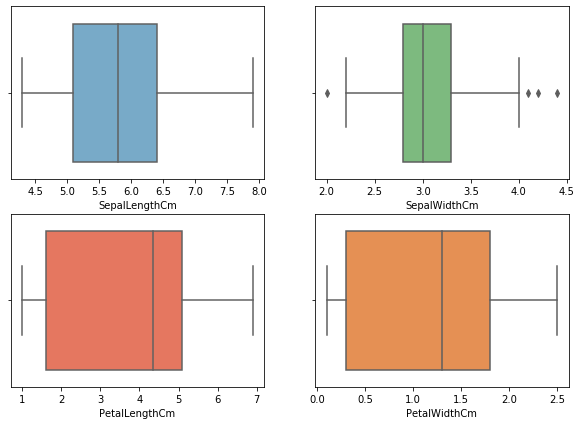

In [10]:
#Distribution of each column
fig, axs = plt.subplots(2,2, figsize = (10,7))
plt1 = sns.boxplot(df['SepalLengthCm'], ax = axs[0,0], palette="Blues")
plt2 = sns.boxplot(df['SepalWidthCm'], ax = axs[0,1], palette="Greens")
plt3 = sns.boxplot(df['PetalLengthCm'], ax = axs[1,0], palette="Reds")
plt4 = sns.boxplot(df['PetalWidthCm'], ax = axs[1,1], palette="Oranges")
plt.show()

##### INSIGHT : There are some outliers in the column "SepalWidthCm". We will cap those outliers. Those values which are less than 5%, they are capped equal to the values at 5% and those values which are more than 95%, they are capped equal to the values at 95%.

In [11]:
#Caluclating the quantile1 and quantile3 for gdpp and removing the upper outliers
Q1 = df.SepalWidthCm.quantile(0.05)
Q3 = df.SepalWidthCm.quantile(0.95)

df[(df.SepalWidthCm > Q3)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,5.4,3.9,1.7,0.4,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [12]:
#After removing the outlier
df = df[(df.SepalWidthCm <= Q3) & (df.SepalWidthCm >= Q1)]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


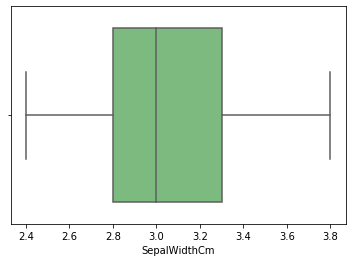

In [13]:
sns.boxplot(df['SepalWidthCm'], palette="Greens")
plt.show()

##### Now we have clean data

<Figure size 720x1080 with 0 Axes>

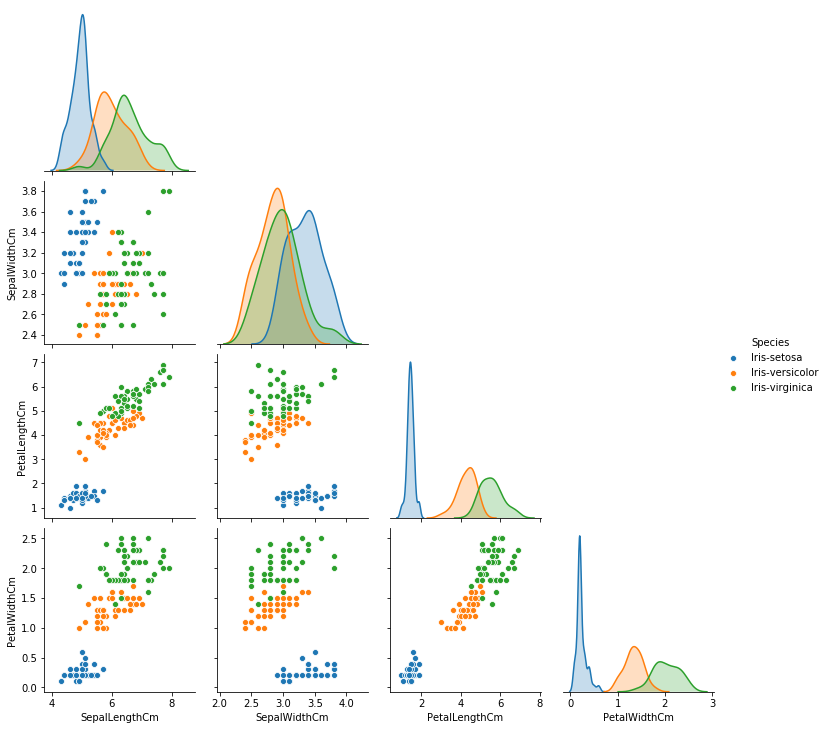

In [14]:
# Pair plot among the numerical variables
fig = plt.figure(figsize=(10,15))
sns.pairplot(df,diag_kind='kde',hue='Species',corner=True)
plt.show()

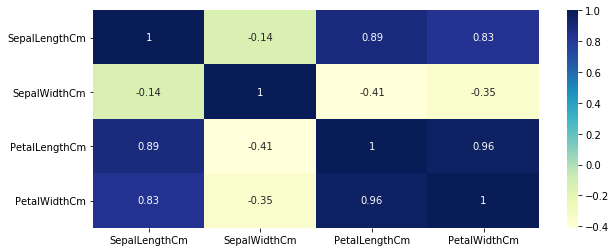

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (10, 4))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### INSIGHT - 
There is high correlation exist between Petal width & Sepal length, Petal width & Petal length, Petal length & Sepal length.

### STEP 4 : Scaling the Data
It is extremely important to rescale the numerical-variables so that they have a comparable scale. There are two common ways of scaling.
1. Min-Max Scaling
2. Standardization(mean=0,sigma=1)

Here we will use Standardization Scaling.

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [16]:
# Import the StandardScaler()
features = df.columns
scaler = StandardScaler()
df_scaled= scaler.fit_transform(df.drop('Species',axis=1))
df_scaled

array([[-0.91599273,  1.2948782 , -1.39938187, -1.35919587],
       [-1.15237795, -0.16777492, -1.39938187, -1.35919587],
       [-1.38876317,  0.41728633, -1.45622654, -1.35919587],
       [-1.50695578,  0.12475571, -1.34253721, -1.35919587],
       [-1.03418534,  1.58740882, -1.39938187, -1.35919587],
       [-1.50695578,  1.00234757, -1.39938187, -1.22901936],
       [-1.03418534,  1.00234757, -1.34253721, -1.35919587],
       [-1.743341  , -0.46030554, -1.39938187, -1.35919587],
       [-1.15237795,  0.12475571, -1.34253721, -1.48937237],
       [-0.5614149 ,  1.87993944, -1.34253721, -1.35919587],
       [-1.27057056,  1.00234757, -1.28569254, -1.35919587],
       [-1.27057056, -0.16777492, -1.39938187, -1.48937237],
       [-1.86153361, -0.16777492, -1.56991586, -1.48937237],
       [-0.91599273,  1.2948782 , -1.39938187, -1.22901936],
       [-0.20683707,  2.17247006, -1.22884788, -1.22901936],
       [-0.91599273,  2.17247006, -1.34253721, -1.22901936],
       [-0.5614149 ,  1.

In [17]:
# data after scaling :
df1 = pd.DataFrame(df_scaled)
df1.columns = features[1:]
df1.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.915993,1.294878,-1.399382,-1.359196
1,-1.152378,-0.167775,-1.399382,-1.359196
2,-1.388763,0.417286,-1.456227,-1.359196
3,-1.506956,0.124756,-1.342537,-1.359196
4,-1.034185,1.587409,-1.399382,-1.359196


### STEP 4 : Data preparation for Clustering
Before applying any clustering algorithm to the given data set, it is important to check whether the given data has some meaningful clusters or not. The process to evaluate the data to check if the data is feasible for clustering or not is known as cluster tendency. To check cluster tendency, we use Hopkins Statistics.

### 1. Hopkins Statistics : 
The Hopkins statistic is a way of measuring the cluster tendency of a data set.
1. A value close to 1 tends to indicate the data is highly clustered.
2. Random data will tend to result in values around 0.5.
3. Uniformly distributed data will tend to result in values close to 0.

In [18]:
#Find the Hopkins statistic score

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

In [19]:
hopkins(df.drop('Species', axis = 1))

0.8468801149605842

We have got the Hopkins score close to 1 which indicate the data is highly clustered.

## Step 5 : Perform Clustering on Data
1. K-Means Clustering
2. Hierarchical Clustering

### I. K-Means Clustering : 
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
The algorithm works as follows:
1. First we initialize k points, called means, randomly.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

In [20]:
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df1)
kmeans.labels_

array([1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0,
       0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 3])

### I. K-Means Clustering : 
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
The algorithm works as follows:
1. First we initialize k points, called means, randomly.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

First we need to find optimal number of clusters. There are two methods to find :
1. Elbow Curve Method/SSD
2. Silhouette Analysis

### (a) Elbow Curve :
In K-Means cluster analysis, the elbow method is used to determine the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

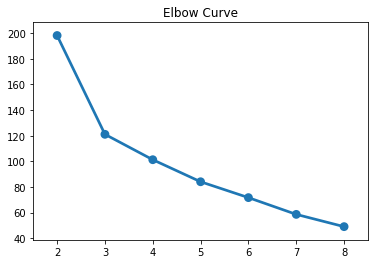

In [21]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df1)
    ssd.append(kmeans.inertia_)
ax = sns.pointplot(x=range_n_clusters, y=ssd)    
plt.title('Elbow Curve')    
plt.show()    

##### Insight:
In the above figure,the elbow is at 3. So we will consider number of clusters to be k=3.


### (b) Silhouette Score/Analysis :
The silhouette score is a measure of how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). 
The value ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [22]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df1,cluster_labels)
    print("For n_clusters={0},the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouette score is 0.5890975170818434
For n_clusters=3,the silhouette score is 0.47077315432639844
For n_clusters=4,the silhouette score is 0.4152882333318022
For n_clusters=5,the silhouette score is 0.3343058646611047
For n_clusters=6,the silhouette score is 0.3422338009256238
For n_clusters=7,the silhouette score is 0.3795872106508779
For n_clusters=8,the silhouette score is 0.3864950245658302


##### Insight:
By looking silhouette scores, for k=2 and k=3, it is the highest value. In general k=2 is not considered, because then it will be just dividing the data into two parts. So we will consider no. of clusters to be k=3.

### KMeans Clustering with k = 3

In [23]:
df1_kmeans = KMeans(n_clusters=3, max_iter=50, random_state= 50)
df1_kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [24]:
df1_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0])

In [25]:
#Finding the labels for the clusters
labels_kmeans = pd.Series(df1_kmeans.labels_, index=df.index)

In [26]:
#Adding the labels to the dataset
df_kmeans = df.copy()
df_kmeans['Cluster_ID'] = labels_kmeans
df_kmeans.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_ID
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [27]:
# Checking the number of species assigned to each clusters
df_kmeans['Cluster_ID'].value_counts()

0    50
2    43
1    43
Name: Cluster_ID, dtype: int64

### Cluster Profiling

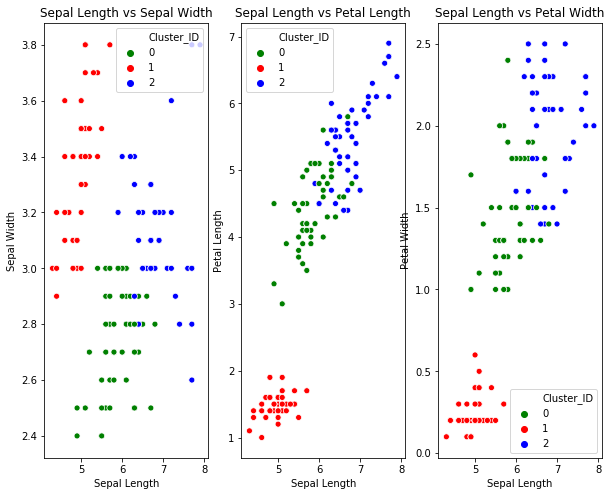

In [28]:
# Bivariate analysis of clustered species
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
axes = sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Length', ylabel= 'Sepal Width')
plt.title("Sepal Length vs Sepal Width")

plt.subplot(1,3,2)
axes = sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Length', ylabel= 'Petal Length')
plt.title("Sepal Length vs Petal Length")

plt.subplot(1,3,3)
axes = sns.scatterplot(x='SepalLengthCm',y='PetalWidthCm',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Length', ylabel= 'Petal Width')
plt.title("Sepal Length vs Petal Width")

plt.show()

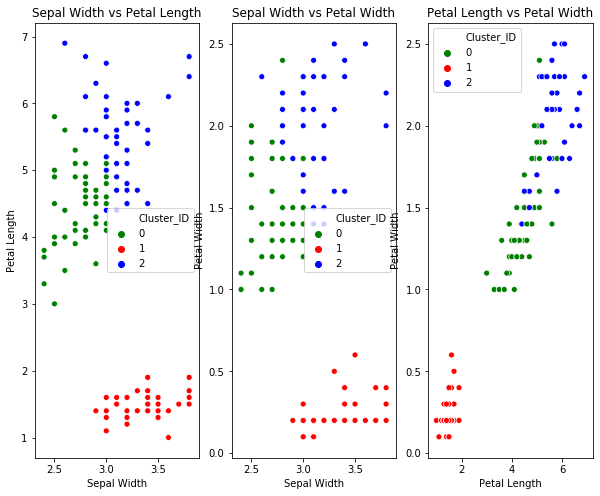

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
axes = sns.scatterplot(x='SepalWidthCm',y='PetalLengthCm',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Width', ylabel= 'Petal Length')
plt.title("Sepal Width vs Petal Length")

plt.subplot(1,3,2)
axes = sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Width', ylabel= 'Petal Width')
plt.title("Sepal Width vs Petal Width")

plt.subplot(1,3,3)
axes = sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'Petal Length', ylabel= 'Petal Width')
plt.title("Petal Length vs Petal Width")
plt.show()

In [30]:
#Mean value of each category of species in each cluster group
sepal_len = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).SepalLengthCm.mean())
sepal_wid = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).SepalWidthCm.mean())
petal_len = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).PetalLengthCm.mean())
petal_wid = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).PetalWidthCm.mean())

In [31]:
cluster_analysis_df = pd.concat([pd.Series([0,1,2]),sepal_len,sepal_wid,petal_len,petal_wid], axis=1)

In [32]:
#Rename the columns
cluster_analysis_df.columns = ["Cluster_ID","clusters_sepal_len","clusters_sepal_wid","clusters_petal_len","clusters_petal_wid"]
cluster_analysis_df

,Cluster_ID,clusters_sepal_len,clusters_sepal_wid,clusters_petal_len,clusters_petal_wid
0,0,5.870000,2.744000,4.474000,1.464000
1,1,4.948837,3.351163,1.472093,0.237209
2,2,6.806977,3.127907,5.539535,1.995349


### Cluster Visualization

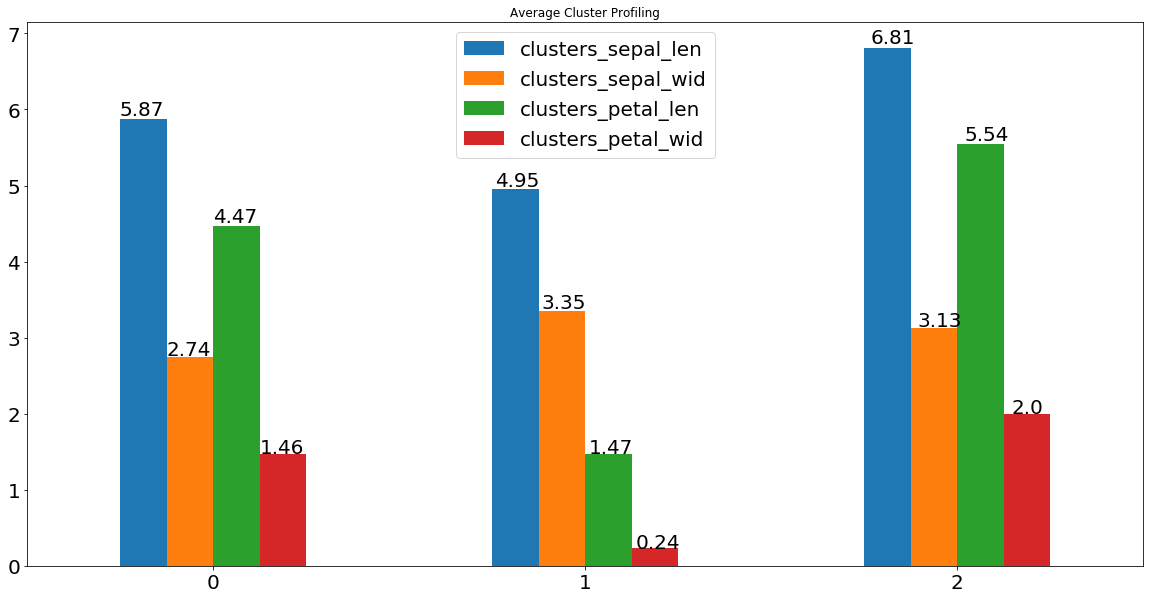

In [33]:
#Visualize the Clusters and mean value of species in each cluster
cluster_visuals = cluster_analysis_df.drop('Cluster_ID',axis=1)
ax = cluster_visuals.plot(kind='bar',figsize=(20,10))
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=20)
plt.title("Average Cluster Profiling")    
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

### Category of Species in each Cluster

In [34]:
#Cluster '0'
df[df_kmeans['Cluster_ID']==0].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [35]:
#Cluster '1'
df[df_kmeans['Cluster_ID']==1].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
#Cluster '2'
df[df_kmeans['Cluster_ID']==2].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor


### Hierarchical Clustering :
Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters.In this case, you don't have pre-defining number of clusters. 

Here, first you have to visually describe the similarity or dissimilarity between the different data points and then decide the appropriate number of clusters on the basis of these similarities or dissimilarities. 

The output of hierarchical clustering results in an inverted tree-shaped structure, called as the Dendrogram.

The different types of linkages in Hierarchical clustering are as follows :
1. Single Linkage: Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters
2. Complete Linkage: Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters
3. Average Linkage: Here, the distance between 2 clusters is defined as the average distance between everypoint of one cluster to every other point of the other cluster.

Here we will using Single and Complete linkage and find which one is better

In [37]:
df1.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.915993,1.294878,-1.399382,-1.359196
1,-1.152378,-0.167775,-1.399382,-1.359196
2,-1.388763,0.417286,-1.456227,-1.359196
3,-1.506956,0.124756,-1.342537,-1.359196
4,-1.034185,1.587409,-1.399382,-1.359196


### Dendrogram to get number of clusters : Single & Complete linkage

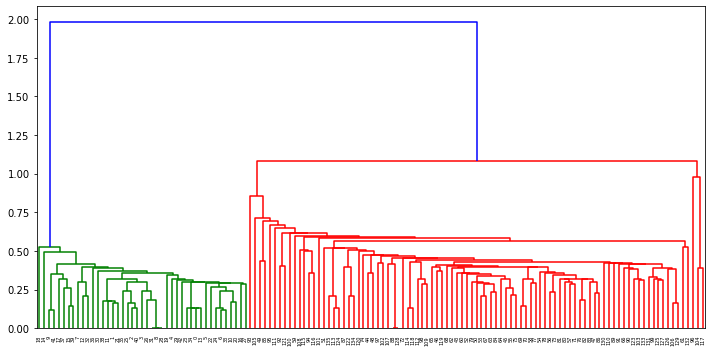

In [38]:
#Single Linkage
plt.figure(figsize = (10,5))
mergings = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.tight_layout()
plt.show()

##### Insight:
We didn't get a good view/result. Try for complete linkage.

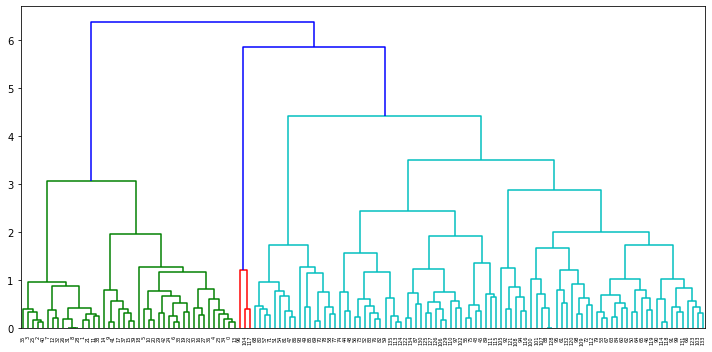

In [39]:
#Complete Linkage
plt.figure(figsize = (10,5))
mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.tight_layout()
plt.show()

##### Insight: 
At 5 there are 3 clusters and at 4 there are 4 clusters.
Let us cut the dendrogram such that there are n_clusters = 3.

### Cluster Analysis :

In [40]:
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [41]:
df_hrcl = df.copy()
df_hrcl.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df_hrcl['Cluster_ID'] = pd.Series(cluster_labels, index=df.index)
df_hrcl.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_ID
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [43]:
#Checking the number of species assigned to each clusters
df_hrcl['Cluster_ID'].value_counts()

1    90
0    43
2     3
Name: Cluster_ID, dtype: int64

### Cluster Profiling :

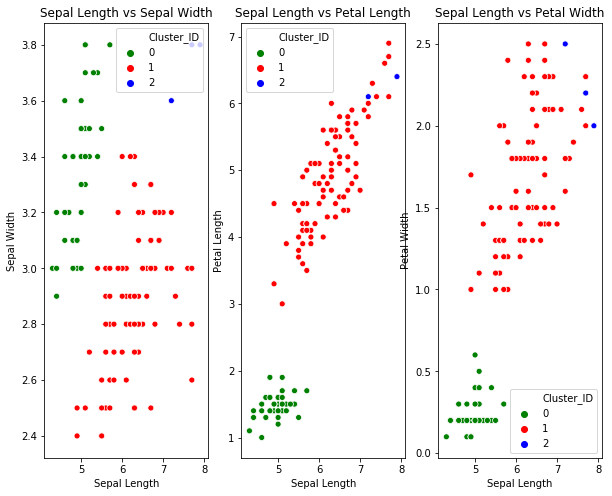

In [44]:
# Bivariate analysis of clustered species
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
axes = sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Cluster_ID',legend='full',data=df_hrcl, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Length', ylabel= 'Sepal Width')
plt.title("Sepal Length vs Sepal Width")

plt.subplot(1,3,2)
axes = sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Cluster_ID',legend='full',data=df_hrcl, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Length', ylabel= 'Petal Length')
plt.title("Sepal Length vs Petal Length")

plt.subplot(1,3,3)
axes = sns.scatterplot(x='SepalLengthCm',y='PetalWidthCm',hue='Cluster_ID',legend='full',data=df_hrcl, palette=['green','red','blue'])
axes.set(xlabel = 'Sepal Length', ylabel= 'Petal Width')
plt.title("Sepal Length vs Petal Width")

plt.show()

In [45]:
sepal_len1 = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).SepalLengthCm.mean())
sepal_wid1 = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).SepalWidthCm.mean())
petal_len1 = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).PetalLengthCm.mean())
petal_wid1 = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).PetalWidthCm.mean())

In [46]:
df_hrcl_cluster = pd.concat([pd.Series([0,1,2]),sepal_len1,sepal_wid1,petal_len1,petal_wid1], axis=1)

In [47]:
df_hrcl_cluster.columns = ["Cluster_ID","clusters_sepal_len","clusters_sepal_wid","clusters_petal_len","clusters_petal_wid"]
df_hrcl_cluster

,Cluster_ID,clusters_sepal_len,clusters_sepal_wid,clusters_petal_len,clusters_petal_wid
0,0,4.948837,3.351163,1.472093,0.237209
1,1,6.260000,2.894444,4.918889,1.692222
2,2,7.600000,3.733333,6.400000,2.233333


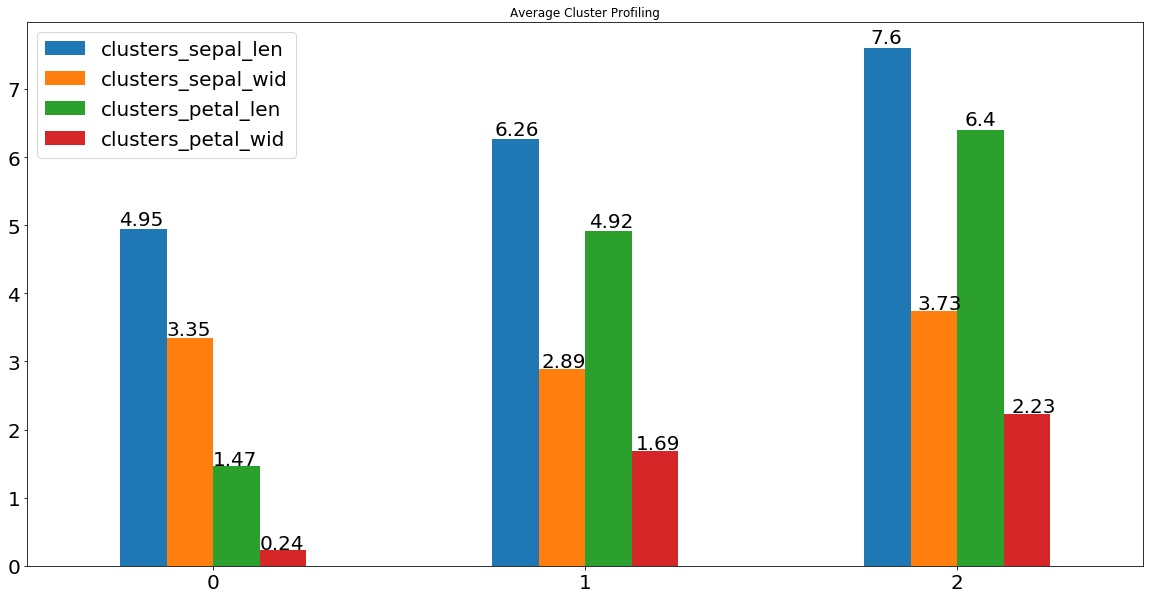

In [48]:
df_hrcl_visuals = df_hrcl_cluster.drop('Cluster_ID',axis=1)
ax = df_hrcl_visuals.plot(kind='bar',figsize=(20,10))
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=20)
plt.title("Average Cluster Profiling")    
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

### Category of Species in each Cluster

In [49]:
#Cluster '0'
df[df_hrcl['Cluster_ID']==0].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
#Cluster '1'
df[df_hrcl['Cluster_ID']==1].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor


In [51]:
#Cluster '2'
df[df_hrcl['Cluster_ID']==2].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
